In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)

2023-01-02 20:05:57.907438: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-01-02 20:05:58.690259: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-01-02 20:05:58.739884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-02 20:05:58.740039: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.56GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 119.24GiB/s
2023-01-02 20:05:58.740061: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-01-02 20:05:58.742353: I tensorflow/stream_executor/pl

In [2]:
image = tf.image.decode_png(tf.io.read_file("Lion.jpg"))
image = tf.expand_dims(image, axis=0)
image = tf.cast(image, tf.float32)
image = tf.image.resize(image, [224,224])
image = tf.keras.applications.mobilenet_v2.preprocess_input(image)

2023-01-02 20:05:58.752716: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 20:05:58.753237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-02 20:05:58.753446: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.56GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 119.24GiB/s
2023-01-02 20:05:58.753553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

In [3]:
def norm_flat_image(img):
    grads_norm = img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm = (grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm

In [4]:
norm_image = norm_flat_image(image[0])

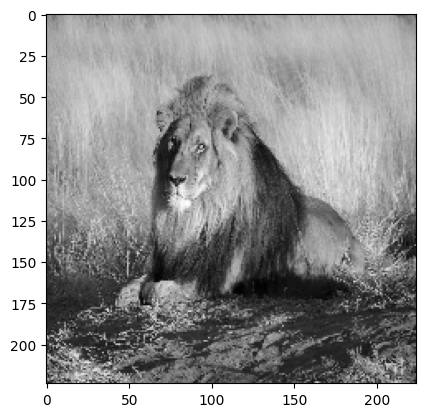

In [5]:
plt.imshow(norm_image, cmap="gray")
plt.show()

In [6]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2()

In [7]:
result = model.predict(image)
max_idx = tf.argmax(result,axis = 1)

2023-01-02 20:06:00.226459: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-02 20:06:00.243778: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400000000 Hz
2023-01-02 20:06:00.718380: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-01-02 20:06:01.136064: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2023-01-02 20:06:01.649163: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-01-02 20:06:01.946343: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


In [8]:
tf.keras.applications.imagenet_utils.decode_predictions(result)

[[('n02129165', 'lion', 0.9361054),
  ('n02106030', 'collie', 0.005230576),
  ('n02117135', 'hyena', 0.002827679),
  ('n02105855', 'Shetland_sheepdog', 0.001966369),
  ('n02130308', 'cheetah', 0.0019526704)]]

In [9]:
with tf.GradientTape() as tape:
    tape.watch(image)
    result = model(image)
    max_score = result[0,max_idx[0]]
grads = tape.gradient(max_score, image)

In [10]:
grads = norm_flat_image(grads[0])

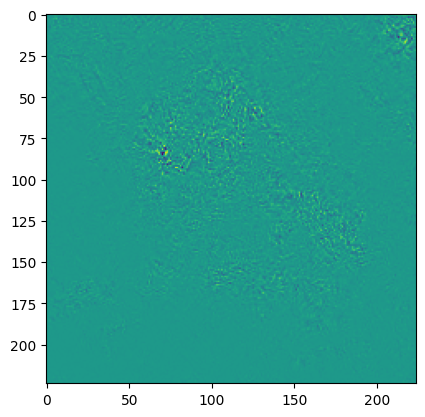

In [11]:
plt.imshow(grads.numpy())
plt.show()

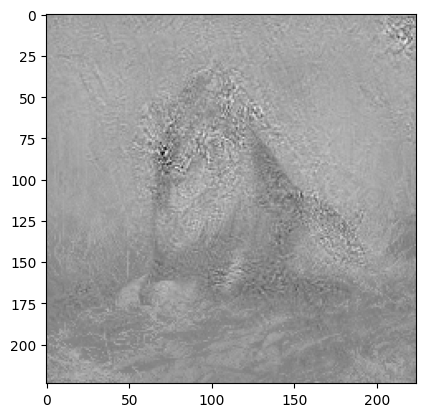

In [12]:
plt.imshow(grads*2+norm_image/2, cmap = "gray" )
plt.show()